In [1]:
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt

In [2]:
k0 = 0.1
k1 = 0.125
k2 = 0.2
b0 = 0.145

A = np.array([[-k0-k1, k1],
              [k2, -k2]])

B = np.array([[b0],
              [0]])

C = np.array([[1,0]])

In [ ]:
eig_d = np.array([[-2, -3]])
V = ctrl.obsv(A, C)

# Si el rango de la matriz de observabilidad es n, entonces el sistema
# es observable. O bien, el |V| != 0
print("|V| = ", np.linalg.det(V))

print(np.linalg.eigvals(A))

In [ ]:
eig_d = [-2, -3]
L = ctrl.place(A, C.T, eig_d).T
L

In [ ]:
print(A - L*C)

In [67]:
# Parametros de simulacion
h = 1e-2
tfin = 10
N = int(np.ceil((tfin -h)/h))
t = h + np.arange(0,N)*h

# Estados de la planta
c1 = np.zeros(N)
c2 = np.zeros(N)

# Estados estimados
ci_obsv = [1, 1] # condiciones iniciales del observador
c1_g = np.hstack((ci_obsv[0], np.zeros(N-1)))
c2_g = np.hstack((ci_obsv[1], np.zeros(N-1)))

# Entrada
u = np.ones(N)

for k in range(N-1):
    # Modelo compartimental que describe
    # la concentracion de farmaco en el plasma
    # sanguineo
    c1[k+1] = c1[k] + h*( (-k0-k1)*c1[k] + k1*c2[k] + b0*u[k] )
    c2[k+1] = c2[k] + h*( k2*c1[k] - k2*c2[k] )

    # Observador de estados tipo Luenberger
    c1_g[k+1] = c1_g[k] + h*( (-k0-k1)*c1_g[k] + k1*c2_g[k] + b0*u[k] + L[0,0]*(c1[k] - c1_g[k]) )
    c2_g[k+1] = c2_g[k] + h*( k2*c1_g[k] - k2*c2_g[k] + L[1,0]*(c1[k] - c1_g[k]) )

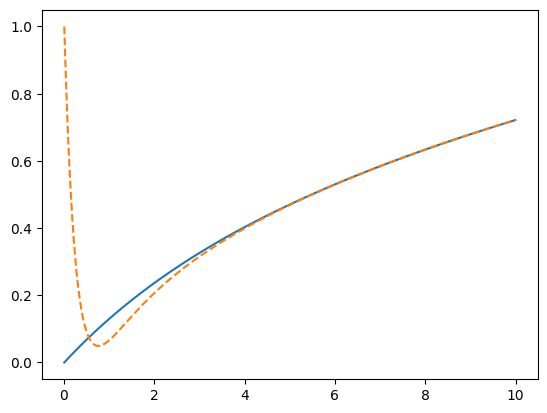

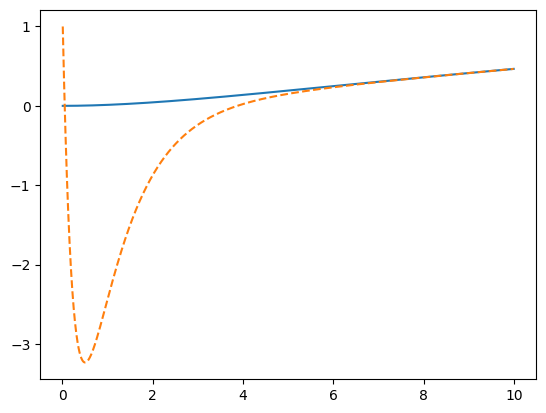

In [68]:
plt.figure()
plt.plot(t, c1)
plt.plot(t, c1_g, '--')

plt.show()

plt.figure()
plt.plot(t, c2)
plt.plot(t, c2_g, '--')

plt.show()

In [ ]:
t.shape